In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/submission/sample_submission_KVKNmI7.csv
/kaggle/input/train-test/train_aWnotuB.csv
/kaggle/input/train-test/test_BdBKkAj_L87Nc3S.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import datetime
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline 
#import the required Modules
import warnings
warnings.filterwarnings('ignore')
# Data visualization
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
import sklearn
import lightgbm as lgb

In [3]:
filename1 = "../input/train-test/train_aWnotuB.csv"
filename2 = "../input/train-test/test_BdBKkAj_L87Nc3S.csv"
filename3 = "../input/submission/sample_submission_KVKNmI7.csv"
train= pd.read_csv(filename1,parse_dates=['DateTime'])
test= pd.read_csv(filename2,parse_dates=['DateTime'])
final_submission = pd.read_csv(filename3)

In [4]:

print("train dataset is of shape: ", train.shape)
print("test dataset is of shape: ", test.shape)

train dataset is of shape:  (48120, 4)
test dataset is of shape:  (11808, 3)


In [5]:
train=train[train['DateTime']>='2016-01-01']

In [6]:
train.head()

,DateTime,Junction,Vehicles,ID
1464,2016-01-01 00:00:00,1,13,20160101001
1465,2016-01-01 01:00:00,1,13,20160101011
1466,2016-01-01 02:00:00,1,11,20160101021
1467,2016-01-01 03:00:00,1,6,20160101031
1468,2016-01-01 04:00:00,1,8,20160101041


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43728 entries, 1464 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  43728 non-null  datetime64[ns]
 1   Junction  43728 non-null  int64         
 2   Vehicles  43728 non-null  int64         
 3   ID        43728 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.7 MB


In [8]:
test.head()

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
3,2017-07-01 03:00:00,1,20170701031
4,2017-07-01 04:00:00,1,20170701041


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  11808 non-null  datetime64[ns]
 1   Junction  11808 non-null  int64         
 2   ID        11808 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 276.9 KB


In [10]:
final_submission.head()

,ID,Vehicles
0,20170701001,50
1,20170701011,50
2,20170701021,50
3,20170701031,50
4,20170701041,50


In [11]:
train['train_or_test']='train'
test['train_or_test']='test'
df=pd.concat([train,test])

In [12]:
df.shape

(55536, 5)

In [13]:
df['Month'] = pd.DatetimeIndex(df['DateTime']).month
df['Year'] =  pd.DatetimeIndex(df['DateTime']).year
df['Day'] = pd.DatetimeIndex(df['DateTime']).day
df['Dayofweek']= pd.DatetimeIndex(df['DateTime']).dayofweek
df['Dayofyear'] =pd.DatetimeIndex(df['DateTime']).dayofyear
df['Week'] = pd.DatetimeIndex(df['DateTime']).week
df['Quarter']= pd.DatetimeIndex(df['DateTime']).quarter
df['IsMonthStart'] = pd.DatetimeIndex(df['DateTime']).is_month_start
df['IsMonthEnd']= pd.DatetimeIndex(df['DateTime']).is_month_end
df['IsQuarterStart']= pd.DatetimeIndex(df['DateTime']).is_quarter_start
df['IsQuarterEnd']= pd.DatetimeIndex(df['DateTime']).is_quarter_end
df['IsYearStart']= pd.DatetimeIndex(df['DateTime']).is_year_start
df['IsYearEnd']= pd.DatetimeIndex(df['DateTime']).is_year_end
df['Semester'] = np.where(df['Quarter'].isin([1,2]),1,2)
df['Is_weekend'] = np.where(df['Dayofweek'].isin([5,6]),1,0)
df['Is_weekday'] = np.where(df['Dayofweek'].isin([0,1,2,3,4]),1,0)
df['Days_in_month'] = pd.DatetimeIndex(df['DateTime']).days_in_month   
df['Hour'] = pd.DatetimeIndex(df['DateTime']).hour

In [14]:
df.head()

,DateTime,Junction,Vehicles,ID,train_or_test,Month,Year,Day,Dayofweek,Dayofyear,Week,Quarter,IsMonthStart,IsMonthEnd,IsQuarterStart,IsQuarterEnd,IsYearStart,IsYearEnd,Semester,Is_weekend,Is_weekday,Days_in_month,Hour
1464,2016-01-01 00:00:00,1,13.0,20160101001,train,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,0
1465,2016-01-01 01:00:00,1,13.0,20160101011,train,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,1
1466,2016-01-01 02:00:00,1,11.0,20160101021,train,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,2
1467,2016-01-01 03:00:00,1,6.0,20160101031,train,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,3
1468,2016-01-01 04:00:00,1,8.0,20160101041,train,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,4


In [15]:
df.Junction.value_counts()

3    16080
2    16080
1    16080
4     7296
Name: Junction, dtype: int64

In [16]:
for col in ['Junction']:
    df = pd.get_dummies(df, columns=[col])

In [17]:
df.head()

,DateTime,Vehicles,ID,train_or_test,Month,Year,Day,Dayofweek,Dayofyear,Week,Quarter,IsMonthStart,IsMonthEnd,IsQuarterStart,IsQuarterEnd,IsYearStart,IsYearEnd,Semester,Is_weekend,Is_weekday,Days_in_month,Hour,Junction_1,Junction_2,Junction_3,Junction_4
1464,2016-01-01 00:00:00,13.0,20160101001,train,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,0,1,0,0,0
1465,2016-01-01 01:00:00,13.0,20160101011,train,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,1,1,0,0,0
1466,2016-01-01 02:00:00,11.0,20160101021,train,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,2,1,0,0,0
1467,2016-01-01 03:00:00,6.0,20160101031,train,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,3,1,0,0,0
1468,2016-01-01 04:00:00,8.0,20160101041,train,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,4,1,0,0,0


In [18]:
df.tail()

,DateTime,Vehicles,ID,train_or_test,Month,Year,Day,Dayofweek,Dayofyear,Week,Quarter,IsMonthStart,IsMonthEnd,IsQuarterStart,IsQuarterEnd,IsYearStart,IsYearEnd,Semester,Is_weekend,Is_weekday,Days_in_month,Hour,Junction_1,Junction_2,Junction_3,Junction_4
11803,2017-10-31 19:00:00,NaN,20171031194,test,10,2017,31,1,304,44,4,False,True,False,False,False,False,2,0,1,31,19,0,0,0,1
11804,2017-10-31 20:00:00,NaN,20171031204,test,10,2017,31,1,304,44,4,False,True,False,False,False,False,2,0,1,31,20,0,0,0,1
11805,2017-10-31 21:00:00,NaN,20171031214,test,10,2017,31,1,304,44,4,False,True,False,False,False,False,2,0,1,31,21,0,0,0,1
11806,2017-10-31 22:00:00,NaN,20171031224,test,10,2017,31,1,304,44,4,False,True,False,False,False,False,2,0,1,31,22,0,0,0,1
11807,2017-10-31 23:00:00,NaN,20171031234,test,10,2017,31,1,304,44,4,False,True,False,False,False,False,2,0,1,31,23,0,0,0,1


In [19]:
train=df.loc[df.train_or_test.isin(['train'])]
test=df.loc[df.train_or_test.isin(['test'])]
train.drop(columns={'train_or_test'},axis=1,inplace=True)
test.drop(columns={'train_or_test'},axis=1,inplace=True)

In [20]:
train['Vehicles']=np.log1p(train['Vehicles'])

In [21]:
train.head()

,DateTime,Vehicles,ID,Month,Year,Day,Dayofweek,Dayofyear,Week,Quarter,IsMonthStart,IsMonthEnd,IsQuarterStart,IsQuarterEnd,IsYearStart,IsYearEnd,Semester,Is_weekend,Is_weekday,Days_in_month,Hour,Junction_1,Junction_2,Junction_3,Junction_4
1464,2016-01-01 00:00:00,2.639057,20160101001,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,0,1,0,0,0
1465,2016-01-01 01:00:00,2.639057,20160101011,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,1,1,0,0,0
1466,2016-01-01 02:00:00,2.484907,20160101021,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,2,1,0,0,0
1467,2016-01-01 03:00:00,1.945910,20160101031,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,3,1,0,0,0
1468,2016-01-01 04:00:00,2.197225,20160101041,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,4,1,0,0,0


In [22]:
train1=train[train['DateTime']<'2017-03-01']
val1=train[train['DateTime']>='2017-03-01']

In [23]:
train1.head()

,DateTime,Vehicles,ID,Month,Year,Day,Dayofweek,Dayofyear,Week,Quarter,IsMonthStart,IsMonthEnd,IsQuarterStart,IsQuarterEnd,IsYearStart,IsYearEnd,Semester,Is_weekend,Is_weekday,Days_in_month,Hour,Junction_1,Junction_2,Junction_3,Junction_4
1464,2016-01-01 00:00:00,2.639057,20160101001,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,0,1,0,0,0
1465,2016-01-01 01:00:00,2.639057,20160101011,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,1,1,0,0,0
1466,2016-01-01 02:00:00,2.484907,20160101021,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,2,1,0,0,0
1467,2016-01-01 03:00:00,1.945910,20160101031,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,3,1,0,0,0
1468,2016-01-01 04:00:00,2.197225,20160101041,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,4,1,0,0,0


In [24]:
train1.tail()

,DateTime,Vehicles,ID,Month,Year,Day,Dayofweek,Dayofyear,Week,Quarter,IsMonthStart,IsMonthEnd,IsQuarterStart,IsQuarterEnd,IsYearStart,IsYearEnd,Semester,Is_weekend,Is_weekday,Days_in_month,Hour,Junction_1,Junction_2,Junction_3,Junction_4
45187,2017-02-28 19:00:00,2.197225,20170228194,2,2017,28,1,59,9,1,False,True,False,False,False,False,1,0,1,28,19,0,0,0,1
45188,2017-02-28 20:00:00,2.639057,20170228204,2,2017,28,1,59,9,1,False,True,False,False,False,False,1,0,1,28,20,0,0,0,1
45189,2017-02-28 21:00:00,2.079442,20170228214,2,2017,28,1,59,9,1,False,True,False,False,False,False,1,0,1,28,21,0,0,0,1
45190,2017-02-28 22:00:00,2.397895,20170228224,2,2017,28,1,59,9,1,False,True,False,False,False,False,1,0,1,28,22,0,0,0,1
45191,2017-02-28 23:00:00,2.484907,20170228234,2,2017,28,1,59,9,1,False,True,False,False,False,False,1,0,1,28,23,0,0,0,1


In [25]:
train1.shape

(32016, 25)

In [26]:
val1.head()

,DateTime,Vehicles,ID,Month,Year,Day,Dayofweek,Dayofyear,Week,Quarter,IsMonthStart,IsMonthEnd,IsQuarterStart,IsQuarterEnd,IsYearStart,IsYearEnd,Semester,Is_weekend,Is_weekday,Days_in_month,Hour,Junction_1,Junction_2,Junction_3,Junction_4
11664,2017-03-01 00:00:00,4.330733,20170301001,3,2017,1,2,60,9,1,True,False,False,False,False,False,1,0,1,31,0,1,0,0,0
11665,2017-03-01 01:00:00,4.060443,20170301011,3,2017,1,2,60,9,1,True,False,False,False,False,False,1,0,1,31,1,1,0,0,0
11666,2017-03-01 02:00:00,4.077537,20170301021,3,2017,1,2,60,9,1,True,False,False,False,False,False,1,0,1,31,2,1,0,0,0
11667,2017-03-01 03:00:00,3.931826,20170301031,3,2017,1,2,60,9,1,True,False,False,False,False,False,1,0,1,31,3,1,0,0,0
11668,2017-03-01 04:00:00,3.761200,20170301041,3,2017,1,2,60,9,1,True,False,False,False,False,False,1,0,1,31,4,1,0,0,0


In [27]:
val1.tail()

,DateTime,Vehicles,ID,Month,Year,Day,Dayofweek,Dayofyear,Week,Quarter,IsMonthStart,IsMonthEnd,IsQuarterStart,IsQuarterEnd,IsYearStart,IsYearEnd,Semester,Is_weekend,Is_weekday,Days_in_month,Hour,Junction_1,Junction_2,Junction_3,Junction_4
48115,2017-06-30 19:00:00,2.484907,20170630194,6,2017,30,4,181,26,2,False,True,False,True,False,False,1,0,1,30,19,0,0,0,1
48116,2017-06-30 20:00:00,3.433987,20170630204,6,2017,30,4,181,26,2,False,True,False,True,False,False,1,0,1,30,20,0,0,0,1
48117,2017-06-30 21:00:00,2.833213,20170630214,6,2017,30,4,181,26,2,False,True,False,True,False,False,1,0,1,30,21,0,0,0,1
48118,2017-06-30 22:00:00,3.135494,20170630224,6,2017,30,4,181,26,2,False,True,False,True,False,False,1,0,1,30,22,0,0,0,1
48119,2017-06-30 23:00:00,2.564949,20170630234,6,2017,30,4,181,26,2,False,True,False,True,False,False,1,0,1,30,23,0,0,0,1


In [28]:
val1.shape

(11712, 25)

In [29]:
newtrain=train[train['DateTime']<'2016-11-01']
train2=train[train['DateTime']<'2016-07-01']
val2=newtrain[newtrain['DateTime']>='2016-07-01']

In [30]:
train2.head()

,DateTime,Vehicles,ID,Month,Year,Day,Dayofweek,Dayofyear,Week,Quarter,IsMonthStart,IsMonthEnd,IsQuarterStart,IsQuarterEnd,IsYearStart,IsYearEnd,Semester,Is_weekend,Is_weekday,Days_in_month,Hour,Junction_1,Junction_2,Junction_3,Junction_4
1464,2016-01-01 00:00:00,2.639057,20160101001,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,0,1,0,0,0
1465,2016-01-01 01:00:00,2.639057,20160101011,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,1,1,0,0,0
1466,2016-01-01 02:00:00,2.484907,20160101021,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,2,1,0,0,0
1467,2016-01-01 03:00:00,1.945910,20160101031,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,3,1,0,0,0
1468,2016-01-01 04:00:00,2.197225,20160101041,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,4,1,0,0,0


In [31]:
train2.tail()

,DateTime,Vehicles,ID,Month,Year,Day,Dayofweek,Dayofyear,Week,Quarter,IsMonthStart,IsMonthEnd,IsQuarterStart,IsQuarterEnd,IsYearStart,IsYearEnd,Semester,Is_weekend,Is_weekday,Days_in_month,Hour,Junction_1,Junction_2,Junction_3,Junction_4
35011,2016-06-30 19:00:00,2.484907,20160630193,6,2016,30,3,182,26,2,False,True,False,True,False,False,1,0,1,30,19,0,0,1,0
35012,2016-06-30 20:00:00,2.197225,20160630203,6,2016,30,3,182,26,2,False,True,False,True,False,False,1,0,1,30,20,0,0,1,0
35013,2016-06-30 21:00:00,2.079442,20160630213,6,2016,30,3,182,26,2,False,True,False,True,False,False,1,0,1,30,21,0,0,1,0
35014,2016-06-30 22:00:00,2.302585,20160630223,6,2016,30,3,182,26,2,False,True,False,True,False,False,1,0,1,30,22,0,0,1,0
35015,2016-06-30 23:00:00,2.397895,20160630233,6,2016,30,3,182,26,2,False,True,False,True,False,False,1,0,1,30,23,0,0,1,0


In [32]:
train2.shape

(13104, 25)

In [33]:
val2.shape

(8856, 25)

In [34]:
val2.head()

,DateTime,Vehicles,ID,Month,Year,Day,Dayofweek,Dayofyear,Week,Quarter,IsMonthStart,IsMonthEnd,IsQuarterStart,IsQuarterEnd,IsYearStart,IsYearEnd,Semester,Is_weekend,Is_weekday,Days_in_month,Hour,Junction_1,Junction_2,Junction_3,Junction_4
5832,2016-07-01 00:00:00,3.688879,20160701001,7,2016,1,4,183,26,3,True,False,True,False,False,False,2,0,1,31,0,1,0,0,0
5833,2016-07-01 01:00:00,3.555348,20160701011,7,2016,1,4,183,26,3,True,False,True,False,False,False,2,0,1,31,1,1,0,0,0
5834,2016-07-01 02:00:00,3.526361,20160701021,7,2016,1,4,183,26,3,True,False,True,False,False,False,2,0,1,31,2,1,0,0,0
5835,2016-07-01 03:00:00,3.218876,20160701031,7,2016,1,4,183,26,3,True,False,True,False,False,False,2,0,1,31,3,1,0,0,0
5836,2016-07-01 04:00:00,3.091042,20160701041,7,2016,1,4,183,26,3,True,False,True,False,False,False,2,0,1,31,4,1,0,0,0


In [35]:
val2.tail()

,DateTime,Vehicles,ID,Month,Year,Day,Dayofweek,Dayofyear,Week,Quarter,IsMonthStart,IsMonthEnd,IsQuarterStart,IsQuarterEnd,IsYearStart,IsYearEnd,Semester,Is_weekend,Is_weekday,Days_in_month,Hour,Junction_1,Junction_2,Junction_3,Junction_4
37963,2016-10-31 19:00:00,2.833213,20161031193,10,2016,31,0,305,44,4,False,True,False,False,False,False,2,0,1,31,19,0,0,1,0
37964,2016-10-31 20:00:00,2.772589,20161031203,10,2016,31,0,305,44,4,False,True,False,False,False,False,2,0,1,31,20,0,0,1,0
37965,2016-10-31 21:00:00,2.708050,20161031213,10,2016,31,0,305,44,4,False,True,False,False,False,False,2,0,1,31,21,0,0,1,0
37966,2016-10-31 22:00:00,2.397895,20161031223,10,2016,31,0,305,44,4,False,True,False,False,False,False,2,0,1,31,22,0,0,1,0
37967,2016-10-31 23:00:00,2.484907,20161031233,10,2016,31,0,305,44,4,False,True,False,False,False,False,2,0,1,31,23,0,0,1,0


In [36]:
newtrain=train[train['DateTime']>='2017-01-01']
train3=pd.concat([train2,newtrain],axis=0)
val3=val2.copy()

In [37]:
newtrain.shape

(17376, 25)

In [38]:
train3.shape

(30480, 25)

In [39]:
val3.shape

(8856, 25)

In [40]:
newtrain.head()

,DateTime,Vehicles,ID,Month,Year,Day,Dayofweek,Dayofyear,Week,Quarter,IsMonthStart,IsMonthEnd,IsQuarterStart,IsQuarterEnd,IsYearStart,IsYearEnd,Semester,Is_weekend,Is_weekday,Days_in_month,Hour,Junction_1,Junction_2,Junction_3,Junction_4
10248,2017-01-01 00:00:00,3.332205,20170101001,1,2017,1,6,1,52,1,True,False,True,False,True,False,1,1,0,31,0,1,0,0,0
10249,2017-01-01 01:00:00,3.178054,20170101011,1,2017,1,6,1,52,1,True,False,True,False,True,False,1,1,0,31,1,1,0,0,0
10250,2017-01-01 02:00:00,2.890372,20170101021,1,2017,1,6,1,52,1,True,False,True,False,True,False,1,1,0,31,2,1,0,0,0
10251,2017-01-01 03:00:00,2.833213,20170101031,1,2017,1,6,1,52,1,True,False,True,False,True,False,1,1,0,31,3,1,0,0,0
10252,2017-01-01 04:00:00,2.833213,20170101041,1,2017,1,6,1,52,1,True,False,True,False,True,False,1,1,0,31,4,1,0,0,0


In [41]:
newtrain.tail()

,DateTime,Vehicles,ID,Month,Year,Day,Dayofweek,Dayofyear,Week,Quarter,IsMonthStart,IsMonthEnd,IsQuarterStart,IsQuarterEnd,IsYearStart,IsYearEnd,Semester,Is_weekend,Is_weekday,Days_in_month,Hour,Junction_1,Junction_2,Junction_3,Junction_4
48115,2017-06-30 19:00:00,2.484907,20170630194,6,2017,30,4,181,26,2,False,True,False,True,False,False,1,0,1,30,19,0,0,0,1
48116,2017-06-30 20:00:00,3.433987,20170630204,6,2017,30,4,181,26,2,False,True,False,True,False,False,1,0,1,30,20,0,0,0,1
48117,2017-06-30 21:00:00,2.833213,20170630214,6,2017,30,4,181,26,2,False,True,False,True,False,False,1,0,1,30,21,0,0,0,1
48118,2017-06-30 22:00:00,3.135494,20170630224,6,2017,30,4,181,26,2,False,True,False,True,False,False,1,0,1,30,22,0,0,0,1
48119,2017-06-30 23:00:00,2.564949,20170630234,6,2017,30,4,181,26,2,False,True,False,True,False,False,1,0,1,30,23,0,0,0,1


In [42]:
train3.head()

,DateTime,Vehicles,ID,Month,Year,Day,Dayofweek,Dayofyear,Week,Quarter,IsMonthStart,IsMonthEnd,IsQuarterStart,IsQuarterEnd,IsYearStart,IsYearEnd,Semester,Is_weekend,Is_weekday,Days_in_month,Hour,Junction_1,Junction_2,Junction_3,Junction_4
1464,2016-01-01 00:00:00,2.639057,20160101001,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,0,1,0,0,0
1465,2016-01-01 01:00:00,2.639057,20160101011,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,1,1,0,0,0
1466,2016-01-01 02:00:00,2.484907,20160101021,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,2,1,0,0,0
1467,2016-01-01 03:00:00,1.945910,20160101031,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,3,1,0,0,0
1468,2016-01-01 04:00:00,2.197225,20160101041,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,4,1,0,0,0


In [43]:
train3.tail()

,DateTime,Vehicles,ID,Month,Year,Day,Dayofweek,Dayofyear,Week,Quarter,IsMonthStart,IsMonthEnd,IsQuarterStart,IsQuarterEnd,IsYearStart,IsYearEnd,Semester,Is_weekend,Is_weekday,Days_in_month,Hour,Junction_1,Junction_2,Junction_3,Junction_4
48115,2017-06-30 19:00:00,2.484907,20170630194,6,2017,30,4,181,26,2,False,True,False,True,False,False,1,0,1,30,19,0,0,0,1
48116,2017-06-30 20:00:00,3.433987,20170630204,6,2017,30,4,181,26,2,False,True,False,True,False,False,1,0,1,30,20,0,0,0,1
48117,2017-06-30 21:00:00,2.833213,20170630214,6,2017,30,4,181,26,2,False,True,False,True,False,False,1,0,1,30,21,0,0,0,1
48118,2017-06-30 22:00:00,3.135494,20170630224,6,2017,30,4,181,26,2,False,True,False,True,False,False,1,0,1,30,22,0,0,0,1
48119,2017-06-30 23:00:00,2.564949,20170630234,6,2017,30,4,181,26,2,False,True,False,True,False,False,1,0,1,30,23,0,0,0,1


In [44]:
val3.head()

,DateTime,Vehicles,ID,Month,Year,Day,Dayofweek,Dayofyear,Week,Quarter,IsMonthStart,IsMonthEnd,IsQuarterStart,IsQuarterEnd,IsYearStart,IsYearEnd,Semester,Is_weekend,Is_weekday,Days_in_month,Hour,Junction_1,Junction_2,Junction_3,Junction_4
5832,2016-07-01 00:00:00,3.688879,20160701001,7,2016,1,4,183,26,3,True,False,True,False,False,False,2,0,1,31,0,1,0,0,0
5833,2016-07-01 01:00:00,3.555348,20160701011,7,2016,1,4,183,26,3,True,False,True,False,False,False,2,0,1,31,1,1,0,0,0
5834,2016-07-01 02:00:00,3.526361,20160701021,7,2016,1,4,183,26,3,True,False,True,False,False,False,2,0,1,31,2,1,0,0,0
5835,2016-07-01 03:00:00,3.218876,20160701031,7,2016,1,4,183,26,3,True,False,True,False,False,False,2,0,1,31,3,1,0,0,0
5836,2016-07-01 04:00:00,3.091042,20160701041,7,2016,1,4,183,26,3,True,False,True,False,False,False,2,0,1,31,4,1,0,0,0


In [45]:
val3.tail()

,DateTime,Vehicles,ID,Month,Year,Day,Dayofweek,Dayofyear,Week,Quarter,IsMonthStart,IsMonthEnd,IsQuarterStart,IsQuarterEnd,IsYearStart,IsYearEnd,Semester,Is_weekend,Is_weekday,Days_in_month,Hour,Junction_1,Junction_2,Junction_3,Junction_4
37963,2016-10-31 19:00:00,2.833213,20161031193,10,2016,31,0,305,44,4,False,True,False,False,False,False,2,0,1,31,19,0,0,1,0
37964,2016-10-31 20:00:00,2.772589,20161031203,10,2016,31,0,305,44,4,False,True,False,False,False,False,2,0,1,31,20,0,0,1,0
37965,2016-10-31 21:00:00,2.708050,20161031213,10,2016,31,0,305,44,4,False,True,False,False,False,False,2,0,1,31,21,0,0,1,0
37966,2016-10-31 22:00:00,2.397895,20161031223,10,2016,31,0,305,44,4,False,True,False,False,False,False,2,0,1,31,22,0,0,1,0
37967,2016-10-31 23:00:00,2.484907,20161031233,10,2016,31,0,305,44,4,False,True,False,False,False,False,2,0,1,31,23,0,0,1,0


In [46]:
import time
def datetounix(df):
    # Initialising unixtime list
    unixtime = []
    
    # Running a loop for converting Date to seconds
    for date in df['DateTime']:
        unixtime.append(time.mktime(date.timetuple()))
    
    # Replacing Date with unixtime list
    df['DateTime'] = unixtime
    return(df)

#train and Validation datasets
train1=datetounix(train1)
val1=datetounix(val1)
train2=datetounix(train2)
val2=datetounix(val2)
train3=datetounix(train3)
val3=datetounix(val3)

#Original train and Test datasets
train=datetounix(train)
test=datetounix(test)

In [47]:
train.head()

,DateTime,Vehicles,ID,Month,Year,Day,Dayofweek,Dayofyear,Week,Quarter,IsMonthStart,IsMonthEnd,IsQuarterStart,IsQuarterEnd,IsYearStart,IsYearEnd,Semester,Is_weekend,Is_weekday,Days_in_month,Hour,Junction_1,Junction_2,Junction_3,Junction_4
1464,1.451606e+09,2.639057,20160101001,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,0,1,0,0,0
1465,1.451610e+09,2.639057,20160101011,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,1,1,0,0,0
1466,1.451614e+09,2.484907,20160101021,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,2,1,0,0,0
1467,1.451617e+09,1.945910,20160101031,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,3,1,0,0,0
1468,1.451621e+09,2.197225,20160101041,1,2016,1,4,1,53,1,True,False,True,False,True,False,1,0,1,31,4,1,0,0,0


In [48]:
test.head()

,DateTime,Vehicles,ID,Month,Year,Day,Dayofweek,Dayofyear,Week,Quarter,IsMonthStart,IsMonthEnd,IsQuarterStart,IsQuarterEnd,IsYearStart,IsYearEnd,Semester,Is_weekend,Is_weekday,Days_in_month,Hour,Junction_1,Junction_2,Junction_3,Junction_4
0,1.498867e+09,NaN,20170701001,7,2017,1,5,182,26,3,True,False,True,False,False,False,2,1,0,31,0,1,0,0,0
1,1.498871e+09,NaN,20170701011,7,2017,1,5,182,26,3,True,False,True,False,False,False,2,1,0,31,1,1,0,0,0
2,1.498874e+09,NaN,20170701021,7,2017,1,5,182,26,3,True,False,True,False,False,False,2,1,0,31,2,1,0,0,0
3,1.498878e+09,NaN,20170701031,7,2017,1,5,182,26,3,True,False,True,False,False,False,2,1,0,31,3,1,0,0,0
4,1.498882e+09,NaN,20170701041,7,2017,1,5,182,26,3,True,False,True,False,False,False,2,1,0,31,4,1,0,0,0


In [49]:
x_train1=train1.drop(columns={'ID','Vehicles'},axis=1)
y_train1=train1.loc[:,['Vehicles']]
#######################################
x_val1=val1.drop(columns={'ID','Vehicles'},axis=1)
y_val1=val1.loc[:,['Vehicles']]

In [50]:
x_train2=train2.drop(columns={'ID','Vehicles'},axis=1)
y_train2=train2.loc[:,['Vehicles']]
##########################################
x_val2=val2.drop(columns={'ID','Vehicles'},axis=1)
y_val2=val2.loc[:,['Vehicles']]

In [51]:
x_train3=train3.drop(columns={'ID','Vehicles'},axis=1)
y_train3=train3.loc[:,['Vehicles']]
#############################################
x_val3=val3.drop(columns={'ID','Vehicles'},axis=1)
y_val3=val3.loc[:,['Vehicles']]

In [52]:
train.columns

Index(['DateTime', 'Vehicles', 'ID', 'Month', 'Year', 'Day', 'Dayofweek',
       'Dayofyear', 'Week', 'Quarter', 'IsMonthStart', 'IsMonthEnd',
       'IsQuarterStart', 'IsQuarterEnd', 'IsYearStart', 'IsYearEnd',
       'Semester', 'Is_weekend', 'Is_weekday', 'Days_in_month', 'Hour',
       'Junction_1', 'Junction_2', 'Junction_3', 'Junction_4'],
      dtype='object')

In [53]:
#Getting which Algorithm to use
features = [i for i in train.columns if i not in ('ID','Vehicles')]
target =  'Vehicles'
import time
import warnings
warnings.simplefilter('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor,ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestRegressor,StackingClassifier,VotingClassifier,BaggingClassifier,ExtraTreesRegressor,GradientBoostingRegressor,BaggingClassifier,ExtraTreesRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

!pip install catboost
import xgboost as xgb
import lightgbm as lgb
import catboost as cat

In [54]:
def baseliner(train, features, target, cv=3, metric='neg_root_mean_squared_error'):
    """
    Function for baselining Models which return CV Score, Train Score, Valid Score
    """
    print("Baseliner Models\n")
    eval_dict = {}
    models = [lgb.LGBMRegressor(), xgb.XGBRegressor(), cat.CatBoostRegressor(verbose=0), GradientBoostingRegressor(), LogisticRegression(), 
              RandomForestRegressor(), DecisionTreeRegressor(), AdaBoostClassifier(),ExtraTreeRegressor(),ExtraTreeClassifier(),
              KNeighborsClassifier(),BaggingClassifier()
             ]
    print("Model Name \t |   CV")
    print("--" * 50)

    for index, model in enumerate(models, 0):
        model_name = str(model).split("(")[0]
        eval_dict[model_name] = {}

        results = cross_val_score(model, train[features], train[target], cv=cv, scoring=metric)
        eval_dict[model_name]['cv'] = results.mean()

        print("%s \t | %.4f \t" % (
            model_name[:12], eval_dict[model_name]['cv']))

In [55]:
baseliner(train,features,target)

Baseliner Models

Model Name 	 |   CV
----------------------------------------------------------------------------------------------------
LGBMRegresso 	 | -0.8832 	
XGBRegressor 	 | -0.9040 	
<catboost.co 	 | -0.8358 	
GradientBoos 	 | -0.8352 	
LogisticRegr 	 | nan 	
RandomForest 	 | -0.8788 	
DecisionTree 	 | -0.9358 	
AdaBoostClas 	 | nan 	
ExtraTreeReg 	 | -0.8457 	
ExtraTreeCla 	 | nan 	
KNeighborsCl 	 | nan 	
BaggingClass 	 | nan 	


In [56]:
from xgboost import XGBRegressor
from xgboost import plot_importance

In [57]:
ts = time.time()

model = XGBRegressor(
    max_depth=10,
    booster = "gbtree",
    n_estimators=100000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,
    seed=42,
    objective='reg:linear')

model.fit(
    x_train1, 
    y_train1, 
    eval_metric="rmse", 
    eval_set=[(x_train1, y_train1), (x_val1, y_val1)], 
    verbose=True, 
    early_stopping_rounds = 100)

time.time() - ts

[06:25:26] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2.23786	validation_1-rmse:2.41534
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:2.01823	validation_1-rmse:2.19223
[2]	validation_0-rmse:1.82113	validation_1-rmse:1.98700
[3]	validation_0-rmse:1.64596	validation_1-rmse:1.79957
[4]	validation_0-rmse:1.48694	validation_1-rmse:1.63401
[5]	validation_0-rmse:1.34396	validation_1-rmse:1.48611
[6]	validation_0-rmse:1.21978	validation_1-rmse:1.35452
[7]	validation_0-rmse:1.10477	validation_1-rmse:1.23542
[8]	validation_0-rmse:1.00113	validation_1-rmse:1.12901
[9]	validation_0-rmse:0.90843	validation_1-rmse:1.03195
[10]	validation_0-rmse:0.82689	validation_1-rmse:0.93544
[11]	validation_0-rmse:0.75280	validation_1-rmse:0.86302
[12]	validation_0-rmse:0.68685	validati

[139]	validation_0-rmse:0.19999	validation_1-rmse:0.28539
[140]	validation_0-rmse:0.19978	validation_1-rmse:0.28520
[141]	validation_0-rmse:0.19957	validation_1-rmse:0.28513
[142]	validation_0-rmse:0.19950	validation_1-rmse:0.28537
[143]	validation_0-rmse:0.19938	validation_1-rmse:0.28562
[144]	validation_0-rmse:0.19917	validation_1-rmse:0.28558
[145]	validation_0-rmse:0.19891	validation_1-rmse:0.28570
[146]	validation_0-rmse:0.19875	validation_1-rmse:0.28553
[147]	validation_0-rmse:0.19856	validation_1-rmse:0.28552
[148]	validation_0-rmse:0.19846	validation_1-rmse:0.28512
[149]	validation_0-rmse:0.19830	validation_1-rmse:0.28532
[150]	validation_0-rmse:0.19811	validation_1-rmse:0.28526
[151]	validation_0-rmse:0.19806	validation_1-rmse:0.28499
[152]	validation_0-rmse:0.19798	validation_1-rmse:0.28500
[153]	validation_0-rmse:0.19771	validation_1-rmse:0.28510
[154]	validation_0-rmse:0.19763	validation_1-rmse:0.28503
[155]	validation_0-rmse:0.19751	validation_1-rmse:0.28477
[156]	validati

9.139275550842285

In [58]:
pred=model.predict(x_val1)

In [59]:
from sklearn.metrics import mean_squared_error
from math import sqrt
np.sqrt(mean_squared_error(np.expm1(y_val1), np.expm1(pred)))

7.153025019646105

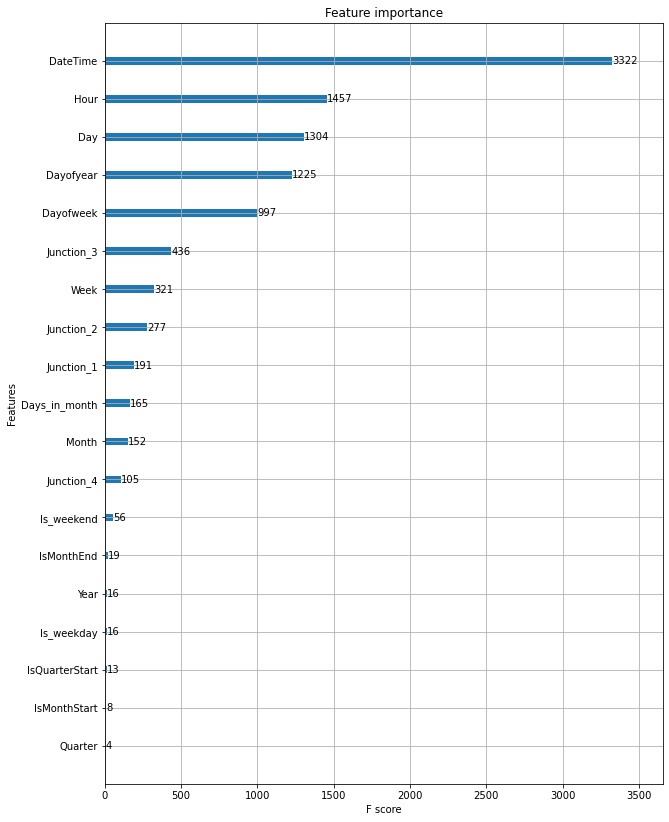

In [60]:
def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

import matplotlib.pyplot as plt
%matplotlib inline
plot_features(model, (10,14))

In [62]:
ts = time.time()

model = XGBRegressor(
    max_depth=10,
    n_estimators=10000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,  
    seed=42)

model.fit(
    x_train2, 
    y_train2, 
    eval_metric="rmse", 
    eval_set=[(x_train2, y_train2), (x_val2, y_val2)], 
    verbose=True, 
    early_stopping_rounds = 100)

time.time() - ts

[0]	validation_0-rmse:2.08962	validation_1-rmse:2.33617
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:1.88542	validation_1-rmse:2.12967
[2]	validation_0-rmse:1.70208	validation_1-rmse:1.94476
[3]	validation_0-rmse:1.53742	validation_1-rmse:1.77656
[4]	validation_0-rmse:1.39419	validation_1-rmse:1.63528
[5]	validation_0-rmse:1.26104	validation_1-rmse:1.50161
[6]	validation_0-rmse:1.14163	validation_1-rmse:1.37989
[7]	validation_0-rmse:1.03869	validation_1-rmse:1.27221
[8]	validation_0-rmse:0.94348	validation_1-rmse:1.17833
[9]	validation_0-rmse:0.85749	validation_1-rmse:1.08980
[10]	validation_0-rmse:0.78082	validation_1-rmse:1.00966
[11]	validation_0-rmse:0.71259	validation_1-rmse:0.93792
[12]	validation_0-rmse:0.65160	validation_1-rmse:0.88031
[13]	validation_0-rmse:0.59713	validation_1-rmse:0.82799
[14]	validation_0-rmse:0.54907	validation_1-rmse:0.7

[141]	validation_0-rmse:0.19920	validation_1-rmse:0.43298
[142]	validation_0-rmse:0.19909	validation_1-rmse:0.43285
[143]	validation_0-rmse:0.19898	validation_1-rmse:0.43312
[144]	validation_0-rmse:0.19893	validation_1-rmse:0.43284
[145]	validation_0-rmse:0.19878	validation_1-rmse:0.43279
[146]	validation_0-rmse:0.19869	validation_1-rmse:0.43257
[147]	validation_0-rmse:0.19857	validation_1-rmse:0.43315
[148]	validation_0-rmse:0.19850	validation_1-rmse:0.43315
[149]	validation_0-rmse:0.19839	validation_1-rmse:0.43322
[150]	validation_0-rmse:0.19825	validation_1-rmse:0.43313
[151]	validation_0-rmse:0.19822	validation_1-rmse:0.43308
[152]	validation_0-rmse:0.19811	validation_1-rmse:0.43295
[153]	validation_0-rmse:0.19799	validation_1-rmse:0.43285
[154]	validation_0-rmse:0.19789	validation_1-rmse:0.43296
[155]	validation_0-rmse:0.19781	validation_1-rmse:0.43301
[156]	validation_0-rmse:0.19767	validation_1-rmse:0.43282
[157]	validation_0-rmse:0.19755	validation_1-rmse:0.43241
[158]	validati

2.5698421001434326

In [63]:
from sklearn.metrics import mean_squared_error
from math import sqrt
pred=model.predict(x_val2)
sqrt(mean_squared_error(np.expm1(y_val2), np.expm1(pred)))

10.111366971607437

**Validation Of Dataset 3**

In [64]:
ts = time.time()

model = XGBRegressor(
    max_depth=5,
    n_estimators=10000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,    
    seed=42)

model.fit(
    x_train3, 
    y_train3, 
    eval_metric="rmse", 
    eval_set=[(x_train3, y_train3), (x_val3, y_val3)], 
    verbose=True, 
    early_stopping_rounds = 100)

time.time() - ts

[0]	validation_0-rmse:2.26025	validation_1-rmse:2.33130
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:2.04152	validation_1-rmse:2.09519
[2]	validation_0-rmse:1.84255	validation_1-rmse:1.91077
[3]	validation_0-rmse:1.66642	validation_1-rmse:1.72034
[4]	validation_0-rmse:1.50583	validation_1-rmse:1.57323
[5]	validation_0-rmse:1.36167	validation_1-rmse:1.44085
[6]	validation_0-rmse:1.24271	validation_1-rmse:1.33622
[7]	validation_0-rmse:1.12591	validation_1-rmse:1.22917
[8]	validation_0-rmse:1.02181	validation_1-rmse:1.13501
[9]	validation_0-rmse:0.92896	validation_1-rmse:1.04901
[10]	validation_0-rmse:0.84642	validation_1-rmse:0.97836
[11]	validation_0-rmse:0.77210	validation_1-rmse:0.91068
[12]	validation_0-rmse:0.70557	validation_1-rmse:0.84845
[13]	validation_0-rmse:0.64657	validation_1-rmse:0.79298
[14]	validation_0-rmse:0.59433	validation_1-rmse:0.7

[141]	validation_0-rmse:0.21440	validation_1-rmse:0.42069
[142]	validation_0-rmse:0.21422	validation_1-rmse:0.42074
[143]	validation_0-rmse:0.21418	validation_1-rmse:0.42079
[144]	validation_0-rmse:0.21407	validation_1-rmse:0.41978
[145]	validation_0-rmse:0.21361	validation_1-rmse:0.42178
Stopping. Best iteration:
[45]	validation_0-rmse:0.24454	validation_1-rmse:0.39717



3.2693870067596436

In [65]:
pred=model.predict(x_val3)
sqrt(mean_squared_error(np.expm1(y_val3), np.expm1(pred)))

10.118372486829147

Modelling using all train data except for that we removed in the early stage ie 2015 data

In [ ]:
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
param_test1 = {
 'max_depth':[8,10,12],
 'min_child_weight':[5,10,15,50,100,200,300],
 'colsample_bytree':[0.8,0.9,1.0],
 'subsample':[0.8,0.9,1.0],
 'eta': [0.1,0.01,0.005,0.05,0.2]    
}
gsearch1 = GridSearchCV(estimator = XGBRegressor(seed=42,eval_metric="rmse"), param_grid = param_test1, scoring='neg_root_mean_squared_error',n_jobs=4,iid=False, cv=5)

gsearch1.fit(x_train2, 
    y_train2, 
    eval_metric="rmse", 
    eval_set=[(x_train2, y_train2), (x_val2, y_val2)],verbose=True)
gsearch1.grid_scores_,
gsearch1.best_params_, 
gsearch1.best_score_

In [ ]:
gsearch1.best_params_

In [ ]:
gsearch1.best_score_

In [66]:
x=train.drop(columns={'ID','Vehicles'},axis=1)
y=train.loc[:,['Vehicles']]
test=test.drop(columns={'ID','Vehicles'},axis=1)

In [67]:

model = XGBRegressor(
    max_depth=12,
    n_estimators=220,
    min_child_weight=5, 
    colsample_bytree=0.9, 
    subsample=0.8,
    objective='reg:linear',
    eta=0.05,
    seed=42)

model.fit(
    x, 
    y)

[06:35:22] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, eta=0.05, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.0500000007, max_delta_step=0, max_depth=12,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             n_estimators=220, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=42, subsample=0.8, tree_method=None,
             validate_parameters=False, verbosity=None)

In [68]:
pred=model.predict(test)
final_submission.head()

,ID,Vehicles
0,20170701001,50
1,20170701011,50
2,20170701021,50
3,20170701031,50
4,20170701041,50


In [70]:
preds = pd.DataFrame(np.expm1(pred),columns=['Vehicles101'])

In [72]:
final_submission['Vehicles'] = preds['Vehicles101']

In [ ]:
final_submission.to_csv('Final_Sub.csv',index=False)